In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
import os
if not os.path.exists("images"):
    os.mkdir("images")
import kaleido 
import plotly.graph_objects as go
import math
from scipy import stats
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [87]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

# reset index so there is only one number associated with each house
housing = housing.reset_index(drop = True)

# deletes duplicate point 
housing = housing.drop_duplicates()

#Convert some numerical variables to categorical 
housing.MSSubClass = housing.MSSubClass.apply(lambda x: str(x))
housing.MoSold = housing.MoSold.apply(lambda x: str(x))
housing.YrSold = housing.YrSold.apply(lambda x: str(x))

# Alley
housing.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)

# Lot Shape
housing.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
housing.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
housing.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope..idk if I'm going to inlude this 
# further investigation there is correlation ..severe slope = more expensiveaaa
housing.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
housing.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
housing.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
housing.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
housing.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
housing.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
housing.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
housing.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
housing.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
housing.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
housing.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
housing.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
housing.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
housing.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
housing.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
housing.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
housing.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

converted_features = ['Alley','LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
        'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
        'GarageCond','PavedDrive','PoolQC']

housing[converted_features] = housing[converted_features].fillna(0)

missing_categorical_none = ['MasVnrType', 'GarageType', 'Fence', 'MiscFeature']  

housing[missing_categorical_none] = housing[missing_categorical_none].fillna('None')

housing.Electrical = housing.Electrical.fillna('SBrkr')

missing_numerical = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                                'GarageCars', 'GarageArea']
housing[missing_numerical] = housing[missing_numerical].fillna(0)

proportion = (housing.LotFrontage/housing.LotArea).mean()

housing.LotFrontage.fillna((housing.LotArea * proportion), inplace=True)

f = lambda x: 'yes' if x>0 else 'no'
housing.PoolArea = housing.PoolArea.map(f)

housing = housing.rename(columns={"PoolArea": "PoolYN"})

housing['GarageYN'] = housing.GarageYrBlt
housing.GarageYN = housing.GarageYN.fillna(0)

housing.GarageYN = housing.GarageYN.map(f)

housing = housing.drop(['GarageYrBlt'], axis = 1).copy()

In [88]:
housing['Bathrooms'] = housing.BsmtFullBath + housing.BsmtHalfBath + housing.FullBath + housing.HalfBath

In [63]:
# this did not help
#housing['TotalSFBuilt'] = housing.TotalBsmtSF + housing.GarageArea + housing.GrLivArea + housing.WoodDeckSF + housing.OpenPorchSF + housing.EnclosedPorch + housing['3SsnPorch'] + housing.ScreenPorch

In [70]:
# this also did not help
# housing['TotalSFInside'] = housing.TotalBsmtSF + housing.GrLivArea

In [80]:
housing.to_csv('housing_pp3.csv')

<Axes: xlabel='GarageCars'>

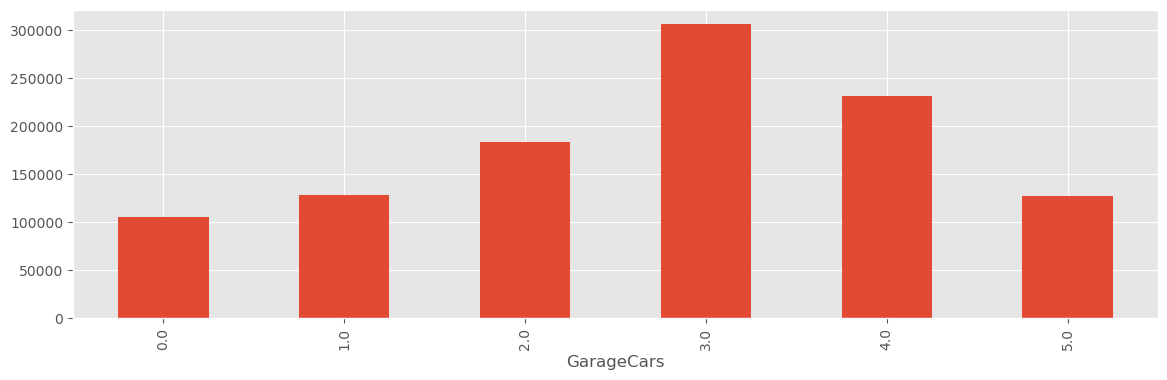

In [95]:
housing.groupby(['GarageCars']).SalePrice.mean().plot(kind='bar', figsize=(14,4))

<Axes: xlabel='OverallQual'>

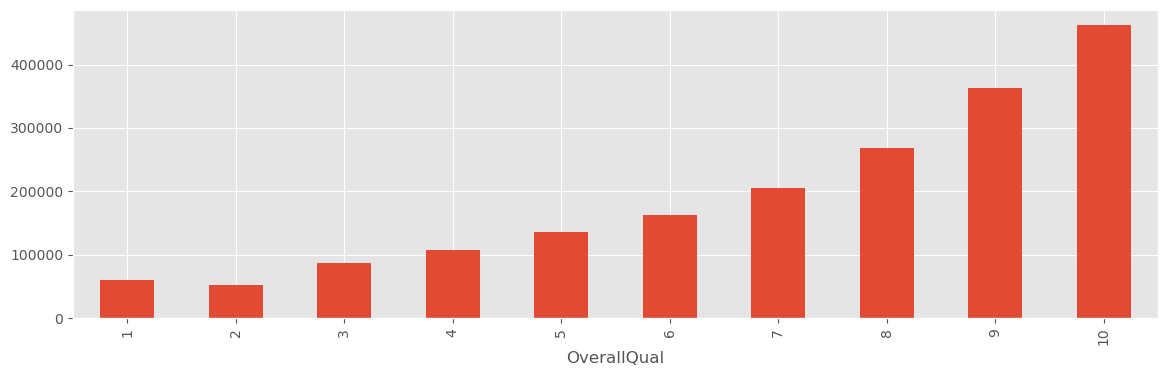

In [94]:
housing.groupby(['OverallQual']).SalePrice.mean().plot(kind='bar', figsize=(14,4))

<Axes: xlabel='ExterQual'>

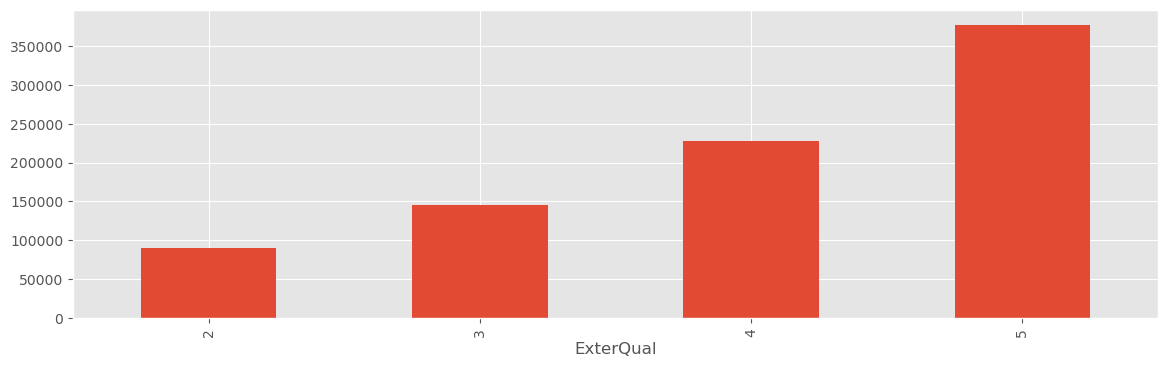

In [93]:
housing.groupby(['ExterQual']).SalePrice.mean().plot(kind='bar', figsize=(14,4))

<Axes: xlabel='KitchenQual'>

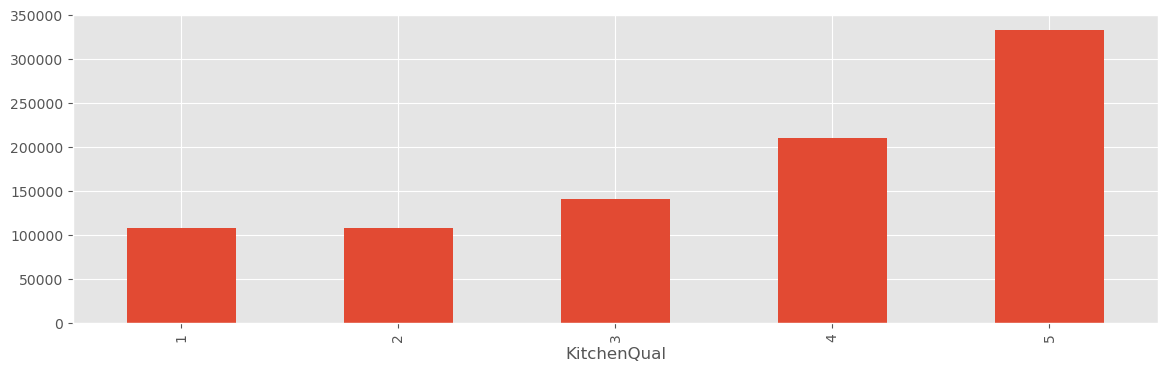

In [92]:
housing.groupby(['KitchenQual']).SalePrice.mean().plot(kind='bar', figsize=(14,4))

In [78]:
housing.MiscFeature.value_counts()

MiscFeature
None    2482
Shed      88
Gar2       5
Othr       3
TenC       1
Name: count, dtype: int64

In [89]:
housing = housing.drop(['MiscFeature'], axis =1).copy()

In [81]:
index_names_normal = housing[housing['SaleCondition'] != 'Normal'].index
housing.drop(index_names_normal, inplace = True)

In [82]:
housing.to_csv('housing_pp4.csv')

In [90]:
index_names_ab_par = housing[(housing['SaleCondition'] == 'Family') | 
                               (housing['SaleCondition'] == 'AdjLand') |
                               (housing['SaleCondition'] == 'Alloca')].index
housing.drop(index_names_ab_par, inplace = True)

In [91]:
housing.to_csv('housing_pp5.csv')